In [ ]:
setwd('/import/linhao/')

library(msigdbr)

m_df = msigdbr(species = "Mus musculus")
head(m_df)

m_df = msigdbr(species = "Mus musculus", category = "C2")

m_df = msigdbr(species = "Mus musculus", category = "C2", subcategory = "CP:KEGG")

m_df %>%  dplyr::filter(grepl('TCA', gs_name)) -> a

a[,4]

meta = read.csv('./mete.csv',header =T)

kegg = read.csv('/import/194.data/data/workdirV6/KEGG_COMPOUND_PATHWAY_mmu.csv')

kegg %>%  dplyr::filter(grepl('TCA', PATHWAY_MAP)) -> kegg2

head(kegg2,1)

intersect(kegg2$COMPOUND,meta$KEGG)



meta %>%  dplyr::filter(KEGG %in% intersect(kegg2$COMPOUND,meta$KEGG) )

meta %>%  dplyr::filter(KEGG %in% intersect(kegg2$COMPOUND,meta$KEGG) ) -> meta2

data = read.csv('./pos.neg.csv')

data %>%  dplyr::filter(Name %in% meta2$Query ) -> RES

RES$log2FC = -RES$log2FC

write.csv(RES,file = 'res.csv',row.names =F)

In [46]:
library(ArrayExpress, quietly=TRUE)
library(tidyverse, quietly=TRUE)
library(affy, quietly=TRUE)

Warning message:
"package 'Biobase' was built under R version 4.2.3"

Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching packages ---------------------------

In [47]:
eset <- ArrayExpress(accession="E-MTAB-1583", path=".", save=TRUE)

ERROR: Error in file(con, "r"): cannot open the connection to 'https://www.ebi.ac.uk/arrayexpress/xml/v2/files/E-MTAB-1583'


In [49]:
library(phyloseq)
library(igraph)
library(network)
library(sna)
library(tidyverse)
library(ggClusterNet)


Attaching package: 'ggClusterNet'


The following object is masked from 'package:network':

    network


The following object is masked from 'package:ggplot2':

    alpha




In [53]:
data(ps)

In [101]:
ps = readRDS('/import/194.data/data/workdirV6/carbom.rds')

In [102]:

path = "./result_big_1000/"
dir.create(path)

Warning message in dir.create(path):
"'./result_big_1000' already exists"


In [113]:
result = cor_Big_micro(ps = ps,
                   N = 500,
                   r.threshold=0.6,
                   p.threshold=0.05,
                   method = "spearman"
                   )

In [114]:
#--提取相关矩阵
cor = result[[1]]
dim(cor)
 
result2 <- model_igraph(cor = cor,Top_M = 4,
                         method = "cluster_fast_greedy",
                         seed = 2
)
node = result2[[1]]
head(node)

[1] 500 500

,X1,X2,elements
,<dbl>,<dbl>,<chr>
2530390,4.2934165,-10.661189,2530390
239935,-0.5083253,-2.218441,239935
2576606,7.9329511,-12.678014,2576606
2530393,-0.6747435,-14.935083,2530393
1796646,11.3027040,-10.560450,1796646
1796613,1.7131853,-7.265902,1796613


In [115]:
dat = result2[[2]]
table(dat$model)


mini_model    model_1    model_2    model_3    model_4 
        19        229         18        231          3 

In [116]:
dat = result2[[2]]
head(dat)
tem = data.frame(mod = dat$model,col = dat$color) %>%  
  dplyr::distinct( mod, .keep_all = TRUE)  
col = tem$col
names(col) = tem$mod
 
#---node节点注释#-----------
otu_table = as.data.frame(t(vegan_otu(ps)))
tax_table = as.data.frame(vegan_tax(ps))
nodes = nodeadd(plotcord =node,otu_table = otu_table,tax_table = tax_table)
head(nodes)
#-----计算边#--------
edge = edgeBuild(cor = cor,node = node)
colnames(edge)[8] = "cor"
head(edge)


,orig_model,model,color,OTU,X1,X2
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,3,model_3,#9E0142,2530390,4.2934165,-10.661189
2,1,model_1,#FDBE6E,239935,-0.5083253,-2.218441
3,3,model_3,#9E0142,2576606,7.9329511,-12.678014
4,3,model_3,#9E0142,2530393,-0.6747435,-14.935083
5,3,model_3,#9E0142,1796646,11.3027040,-10.560450
6,3,model_3,#9E0142,1796613,1.7131853,-7.265902


,X1,X2,elements,Kingdom,Phylum,Class,Order,Family,Genus,Species,mean
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1019,3.27009506,-4.2281297,1019,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriales,Flavobacteriaceae,Capnocytophaga,sputigena,51.62500
102134,0.28352712,-0.6898191,102134,Bacteria,Firmicutes,Clostridia,Clostridiales,Peptococcaceae,Desulfallas,gibsoniae,54.78125
1033854,-0.08174812,-1.0002684,1033854,Bacteria,Proteobacteria,Gammaproteobacteria,Chromatiales,Ectothiorhodospiraceae,Thioalkalivibrio,sulfidiphilus,47.09375
1042156,-0.38806104,-1.0415220,1042156,Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,Clostridium,sp. SY8519,657.93750
104336,0.39090354,-1.6305056,104336,Bacteria,Actinobacteria,Actinobacteria,Micrococcales,Microbacteriaceae,Microbacterium,foliorum,47.78125
1063,-0.50873317,-1.6413836,1063,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacter,sphaeroides,46.43750


,X2,Y2,OTU_2,OTU_1,weight,X1,Y1,cor
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,4.2934165,-10.661189,2530390,2025876,-0.6370968,1.1058958,-7.278829,-
2,4.2934165,-10.661189,2530390,1883414,-0.6477273,4.1246213,-4.311103,-
3,4.2934165,-10.661189,2530390,1850093,-0.7324047,0.7249273,-8.996779,-
4,-0.5083253,-2.218441,239935,1796620,-0.6173021,0.4606354,-1.008271,-
5,-0.5083253,-2.218441,239935,2109688,-0.6092375,0.8911098,-1.155095,-
6,-0.5083253,-2.218441,239935,292800,-0.6645894,0.9070870,-1.255181,-


In [117]:
tem2 = dat %>% 
  dplyr::select(OTU,model,color) %>%
  dplyr::right_join(edge,by =c("OTU" = "OTU_1" ) ) %>%
  dplyr::rename(OTU_1 = OTU,model1 = model,color1 = color)
head(tem2)


,OTU_1,model1,color1,X2,Y2,OTU_2,weight,X1,Y1,cor
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,1796620,model_1,#FDBE6E,-0.5083253,-2.2184409,239935,-0.6173021,0.4606354,-1.0082714,-
2,1834196,model_1,#FDBE6E,0.4606354,-1.0082714,1796620,0.8790323,-0.1359655,-0.7265634,+
3,820,model_3,#9E0142,1.7131853,-7.2659015,1796613,0.7569648,2.6091104,-7.2143289,+
4,2109688,model_1,#FDBE6E,-0.5083253,-2.2184409,239935,-0.6092375,0.8911098,-1.1550953,-
5,2109688,model_1,#FDBE6E,0.4606354,-1.0082714,1796620,0.8900293,0.8911098,-1.1550953,+
6,2109688,model_1,#FDBE6E,-0.1359655,-0.7265634,1834196,0.8892962,0.8911098,-1.1550953,+


In [118]:


 
tem3 = dat %>% 
  dplyr::select(OTU,model,color) %>%
  dplyr::right_join(edge,by =c("OTU" = "OTU_2" ) ) %>%
  dplyr::rename(OTU_2 = OTU,model2 = model,color2 = color)
head(tem3)
 
tem4 = tem2 %>%inner_join(tem3)
head(tem4)

,OTU_2,model2,color2,X2,Y2,OTU_1,weight,X1,Y1,cor
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,2530390,model_3,#9E0142,4.2934165,-10.661189,2025876,-0.6370968,1.1058958,-7.278829,-
2,2530390,model_3,#9E0142,4.2934165,-10.661189,1883414,-0.6477273,4.1246213,-4.311103,-
3,2530390,model_3,#9E0142,4.2934165,-10.661189,1850093,-0.7324047,0.7249273,-8.996779,-
4,239935,model_1,#FDBE6E,-0.5083253,-2.218441,1796620,-0.6173021,0.4606354,-1.008271,-
5,239935,model_1,#FDBE6E,-0.5083253,-2.218441,2109688,-0.6092375,0.8911098,-1.155095,-
6,239935,model_1,#FDBE6E,-0.5083253,-2.218441,292800,-0.6645894,0.9070870,-1.255181,-


Joining with `by = join_by(OTU_1, X2, Y2, OTU_2, weight, X1, Y1, cor)`


,OTU_1,model1,color1,X2,Y2,OTU_2,weight,X1,Y1,cor,model2,color2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1796620,model_1,#FDBE6E,-0.5083253,-2.2184409,239935,-0.6173021,0.4606354,-1.0082714,-,model_1,#FDBE6E
2,1834196,model_1,#FDBE6E,0.4606354,-1.0082714,1796620,0.8790323,-0.1359655,-0.7265634,+,model_1,#FDBE6E
3,820,model_3,#9E0142,1.7131853,-7.2659015,1796613,0.7569648,2.6091104,-7.2143289,+,model_3,#9E0142
4,2109688,model_1,#FDBE6E,-0.5083253,-2.2184409,239935,-0.6092375,0.8911098,-1.1550953,-,model_1,#FDBE6E
5,2109688,model_1,#FDBE6E,0.4606354,-1.0082714,1796620,0.8900293,0.8911098,-1.1550953,+,model_1,#FDBE6E
6,2109688,model_1,#FDBE6E,-0.1359655,-0.7265634,1834196,0.8892962,0.8911098,-1.1550953,+,model_1,#FDBE6E


,OTU_1,model1,color1,X2,Y2,OTU_2,weight,X1,Y1,cor,model2,color2,color,manual
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1796620,model_1,#FDBE6E,-0.5083253,-2.2184409,239935,-0.6173021,0.4606354,-1.0082714,-,model_1,#FDBE6E,model_1,#FDBE6E
2,1834196,model_1,#FDBE6E,0.4606354,-1.0082714,1796620,0.8790323,-0.1359655,-0.7265634,+,model_1,#FDBE6E,model_1,#FDBE6E
3,820,model_3,#9E0142,1.7131853,-7.2659015,1796613,0.7569648,2.6091104,-7.2143289,+,model_3,#9E0142,model_3,#9E0142
4,2109688,model_1,#FDBE6E,-0.5083253,-2.2184409,239935,-0.6092375,0.8911098,-1.1550953,-,model_1,#FDBE6E,model_1,#FDBE6E
5,2109688,model_1,#FDBE6E,0.4606354,-1.0082714,1796620,0.8900293,0.8911098,-1.1550953,+,model_1,#FDBE6E,model_1,#FDBE6E
6,2109688,model_1,#FDBE6E,-0.1359655,-0.7265634,1834196,0.8892962,0.8911098,-1.1550953,+,model_1,#FDBE6E,model_1,#FDBE6E


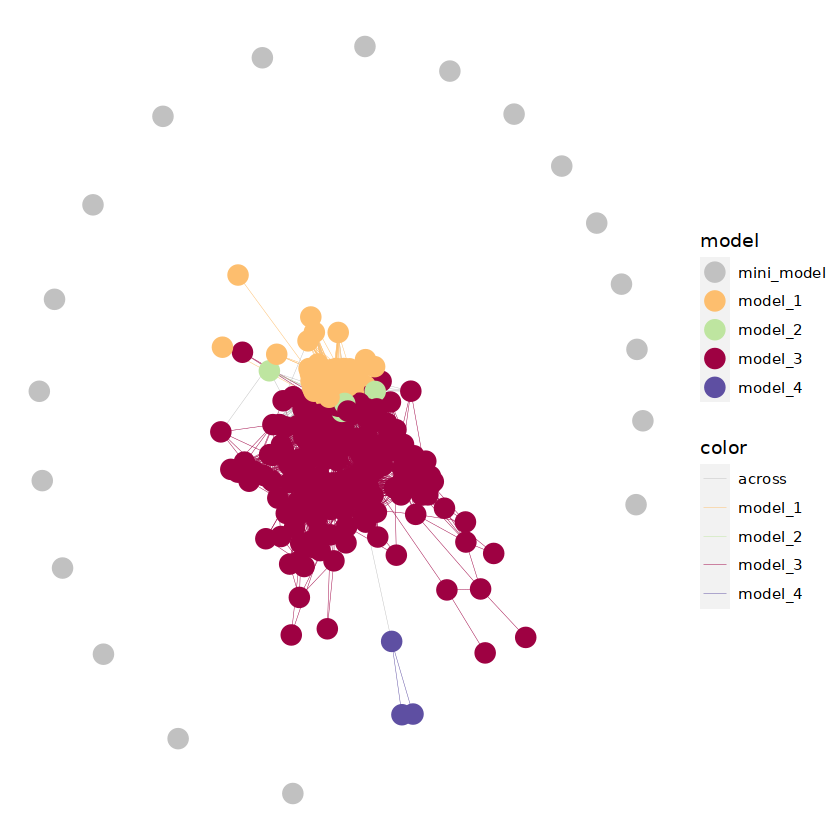

In [120]:


 
edge2 = tem4 %>% mutate(color = ifelse(model1 == model2,as.character(model1),"across"),
                        manual = ifelse(model1 == model2,as.character(color1),"#C1C1C1")
                        )
head(edge2)
col_edge = edge2 %>% dplyr::distinct(color, .keep_all = TRUE)  %>% 
  select(color,manual)
col0 = col_edge$manual
names(col0) = col_edge$color
 
library(ggnewscale)
 
p1 <- ggplot() + geom_segment(aes(x = X1, y = Y1, xend = X2, yend = Y2,color = color),
                              data = edge2, size = 0.1) +
  scale_colour_manual(values = col0) 
 
# ggsave("./cs1.pdf",p1,width = 16,height = 14)
p2 = p1 +
   new_scale_color() +
  geom_point(aes(X1, X2,color =model), data = dat,size = 5) +
  scale_colour_manual(values = col) +
  scale_x_continuous(breaks = NULL) + scale_y_continuous(breaks = NULL) +
  theme(panel.background = element_blank()) +
  theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
  theme(legend.background = element_rect(colour = NA)) +
  theme(panel.background = element_rect(fill = "white",  colour = NA)) +
  theme(panel.grid.minor = element_blank(), panel.grid.major = element_blank())
p2
ggsave("./cs2.pdf",p2,width = 16,height = 14)